<a href="https://colab.research.google.com/github/sanjana110404/SCT_DS_1/blob/main/SCT_DS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
# Creating a simulated Titanic dataset
data = {
    'PassengerId': range(1, 11),
    'Survived': [1, 0, 1, 0, 1, 1, 0, 0, 1, 0],
    'Pclass': [3, 1, 3, 1, 3, 3, 2, 2, 1, 3],
    'Name': [
        'Braund, Mr. Owen Harris', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
        'Heikkinen, Miss. Laina', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
        'Allen, Mr. William Henry', 'Moran, Mr. James', 'McCarthy, Mr. Timothy J',
        'Palsson, Master. Gosta Leonard', 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
        'Nasser, Mrs. Nicholas (Adele Achem)'
    ],
    'Sex': ['male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'female'],
    'Age': [22, 38, 26, 35, 35, np.nan, 54, 2, 27, 14],
    'SibSp': [1, 1, 0, 1, 0, 0, 0, 3, 0, 1],
    'Parch': [0, 0, 0, 0, 0, 0, 0, 1, 2, 0],
    'Ticket': ['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450', '330877', '17463', '349909', '347742', '237736'],
    'Fare': [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.1333, 30.0708],
    'Cabin': [np.nan, 'C85', np.nan, 'C123', np.nan, np.nan, 'E46', np.nan, 'G6', np.nan],
    'Embarked': ['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'C', 'C']
}

df = pd.DataFrame(data)
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,1,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check for missing values
missing_values = df.isnull().sum()

# Fill missing age with median value
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing cabin with 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)

# Check data types
data_types = df.dtypes

# Correct data types if necessary (none needed in this case)

# Check for duplicates
duplicates = df.duplicated().sum()

# Drop duplicates if any (none in this case)
df.drop_duplicates(inplace=True)

missing_values, data_types, duplicates


(PassengerId    0
 Survived       0
 Pclass         0
 Name           0
 Sex            0
 Age            1
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Cabin          6
 Embarked       0
 dtype: int64,
 PassengerId      int64
 Survived         int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Cabin           object
 Embarked        object
 dtype: object,
 0)

In [5]:
# Summary statistics for numerical columns
summary_statistics = df.describe()

# Summary statistics for categorical columns
categorical_summary = df.describe(include=['O'])
summary_statistics, categorical_summary


(       PassengerId   Survived     Pclass        Age      SibSp      Parch  \
 count     10.00000  10.000000  10.000000  10.000000  10.000000  10.000000   
 mean       5.50000   0.500000   2.200000  28.000000   0.700000   0.300000   
 std        3.02765   0.527046   0.918937  14.094916   0.948683   0.674949   
 min        1.00000   0.000000   1.000000   2.000000   0.000000   0.000000   
 25%        3.25000   0.000000   1.250000  23.000000   0.000000   0.000000   
 50%        5.50000   0.500000   2.500000  27.000000   0.500000   0.000000   
 75%        7.75000   1.000000   3.000000  35.000000   1.000000   0.000000   
 max       10.00000   1.000000   3.000000  54.000000   3.000000   2.000000   
 
             Fare  
 count  10.000000  
 mean   27.020820  
 std    23.601938  
 min     7.250000  
 25%     8.152075  
 50%    16.104150  
 75%    46.414575  
 max    71.283300  ,
                            Name   Sex     Ticket    Cabin Embarked
 count                        10    10         

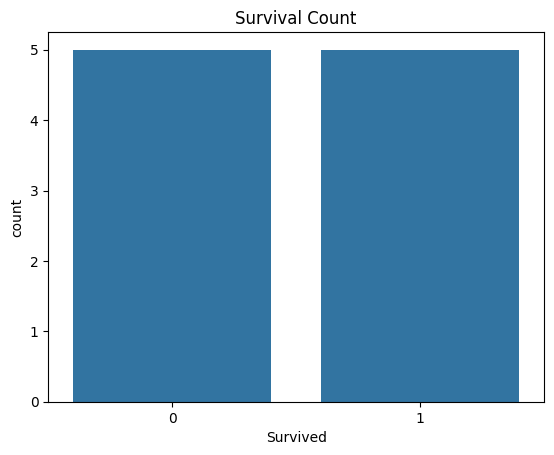

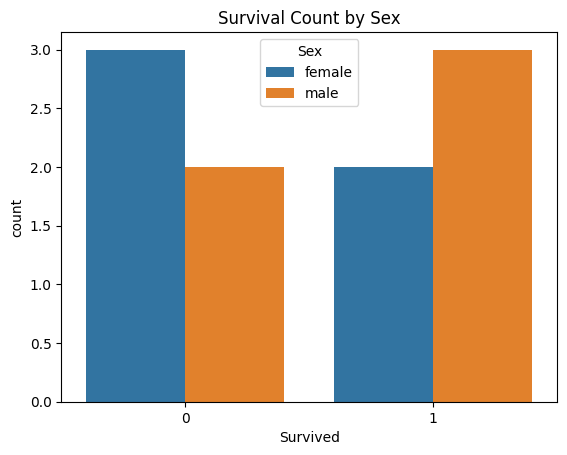

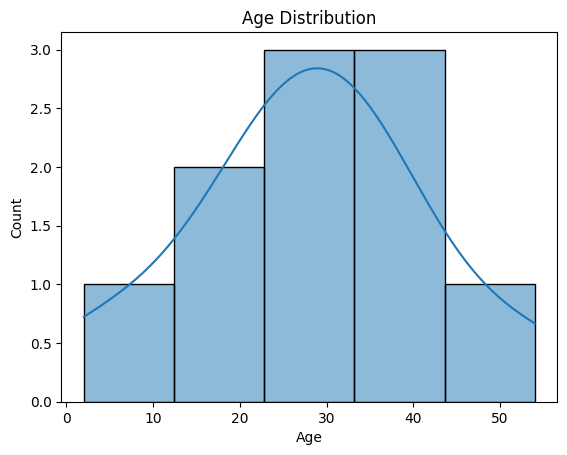

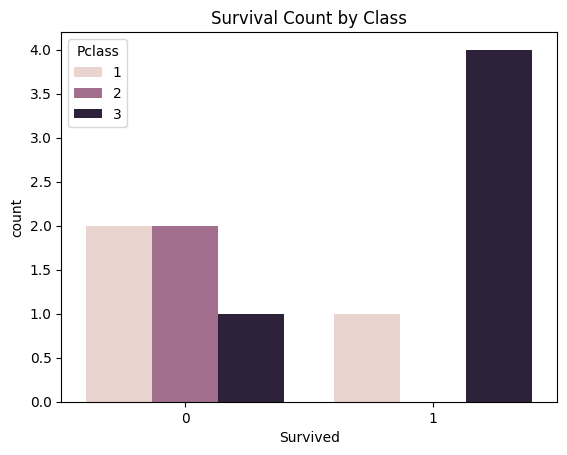

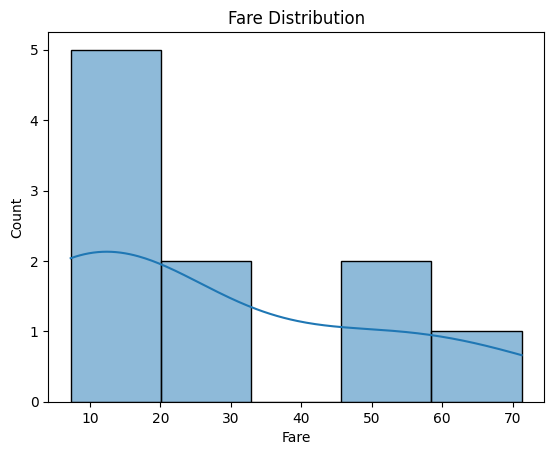

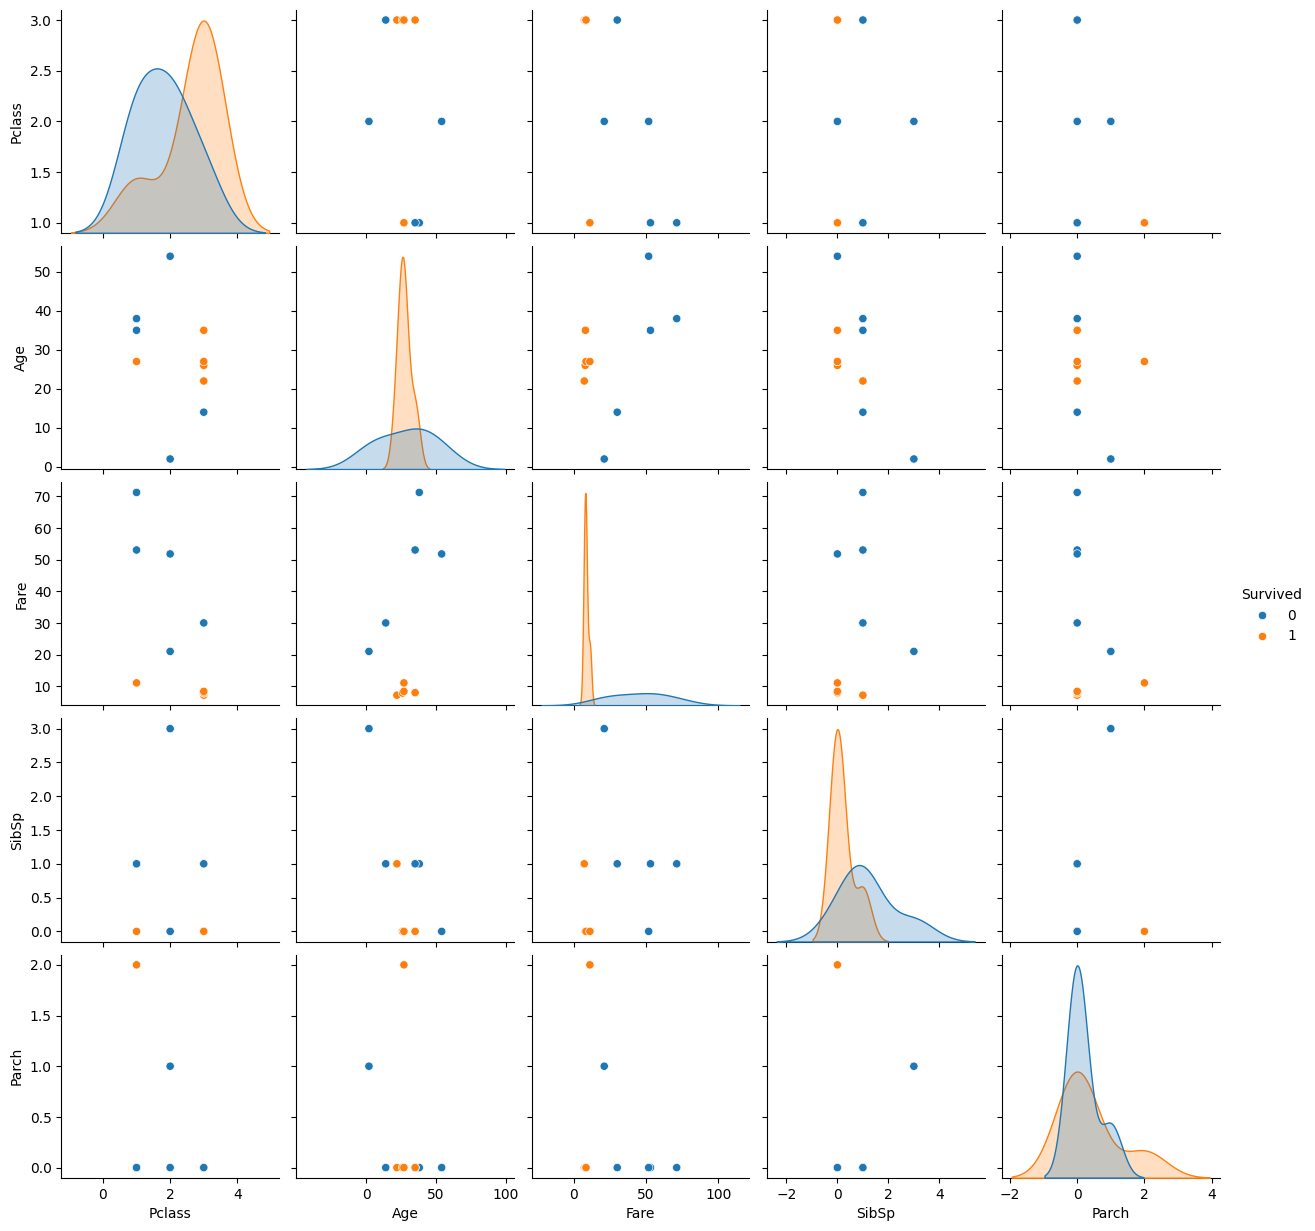

In [7]:
# Survival count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# Survival by sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Sex')
plt.show()

# Age distribution
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Survival by class
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Class')
plt.show()

# Fare distribution
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

# Pairplot to explore relationships between variables
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']], hue='Survived')
plt.show()